> ## Uber Supply Demand - Gap - Assignment
> ### ***Submission by - Srinivasan Gopalakrishnan***
> ### ***Submitted on  - 02, December, 2018***
> ### ***Student Batch - PGDDS September 2018***

### Business Objectives ###

>The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them. 

### Data Description###
> File :***Uber Request Data.csv*** <br><br>
>**Columns :** There are six attributes associated with each request made by a customer:<br> 
1. ***Request id:*** A unique identifier of the request
2. ***Time of request:*** The date and time at which the customer made the trip request
3. ***Drop-off time:*** The drop-off date and time, in case the trip was completed 
4. ***Pick-up point:*** The point from which the request was made
5. ***Driver id:*** The unique identification number of the driver
6. ***Status of the request:*** The final status of the trip, that can be either completed, cancelled by the driver or no cars available
 
### Tasks###

#### Data Cleaning and Preparation ####
>1. Identify the data quality issues and clean the data so that you can use it for analysis.
>2.	Ensure that the dates and time are in the proper format. Derive new variables which will be useful for analysis.

#### Result Expected ####
>1. Visually identify the most pressing problems for Uber.<br> 
    - ***Hint:*** Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots.
    
>2.	Find out the gap between supply and demand and show the same using plots.
    - Find the time slots when the highest gap exists
    - Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots.<br>
    
>3. Identify the reason for this issue for the supply-demand gap. Write the answer in less than 100 words. You may accompany the write-up with plot(s).<br>

>4. Recommend some ways to resolve the supply-demand gap.<br>

### Import Libraries for analysis<br>

In [1]:
# Import All necessary Libraries numpy,pandas,matplotlib and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

### Setup necessary Jupyter notebook options<br>

In [2]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [3]:
# If necessary use the set options of the display . If not required. disable 
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [4]:
#Change the float format for display in notebook
pd.options.display.float_format = '{:,.2f}'.format

### Read the Uber data file <br>

In [5]:
## Read the Uber Request Data.csv file 
uber_data = pd.read_csv("./Data/Uber Request Data.csv") 

### Verify the data and attributes<br>

In [6]:
#check data frame shape 
uber_data.shape

(6745, 6)

In [7]:
# check column names, data types and other info.
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [8]:
# Describe the data frames for the columns.
uber_data.describe()

,Request id,Driver id
count,"6,745.00","4,095.00"
mean,"3,384.64",149.50
std,"1,955.10",86.05
min,1.00,1.00
25%,"1,691.00",75.00
50%,"3,387.00",149.00
75%,"5,080.00",224.00
max,"6,766.00",300.00


In [9]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.00,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.00,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.00,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.00,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.00,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.00,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.00,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.00,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.00,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.00,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


### **Observations**<br>
There are total of `6745 rows and 6 columns` in the data frame. They are ;
>1. The column names contains spaces in between and hence required to be renamed as below for easy analysis  ;
    - `Request_Id`
    - `Pickup_Point`
    - `Driver_Id`
    - `Request_Timestamp`
    - `Drop_Timestamp` <br><br>
>2. The `Request_Id` and `Driver_Id` are the only measures (int and float) respectively. <br><br>
>3. The `Pickup_Point`, `Status` columns are categorical string objects.<br><br>
>5. The `Request_Timestamp` and `Date_Timestamp` contains  date and time information of the unique request made by customer. 
>6. The `Request_Timestamp` and `Drop_Timestamp` can be considered here `ordered categorical` and are string Objects.They should be converted to `Datetime` objects for analysis.<br><br>
>7. Also, both `Request_Timestamp` and `Drop_Timestamp` columns have mixed timestamp format such as `dd/mm/yyyy hh:mm` and `dd-mm-yyyy hh:mm:ss`.<br><br>

### **Inferences**<br>
>1. Change the column names.<br><br>
>2. Change format of both `Request_Timestamp` and `Drop_Timestamp` to a common format like default date time format.<br><br>
>3. Change the date type of columns `Request_Timestamp` and `Drop_Timestamp` to date time format.<br><br>
>4. Split the `Request_Timestamp` column to to other date and time variables such as   `Year`,`Month`,`Day`.`Hour` and `Minutes` for analysis<br><br>

###  Change Column Names<br>

In [10]:
# Change the column names.
uber_data.rename(columns={'Request id':'Request_Id',\
                          'Pickup point':'Pickup_Point',\
                          'Driver id': 'Driver_Id',\
                          'Request timestamp':'Request_Timestamp',\
                          'Drop timestamp':'Drop_Timestamp' \
                         },inplace=True)

###  Change the format and data types of timestamp columns<br>

In [11]:
# Change the timestamp for Request_Timestamp and Drop_Timestamp for consistence.
# format & change Request_Timestamp
uber_data.Request_Timestamp = uber_data.Request_Timestamp.str.replace('/','-')
uber_data.Drop_Timestamp = uber_data.Drop_Timestamp.str.replace('/','-')

In [12]:
uber_data.loc[:,['Request_Timestamp','Drop_Timestamp']].head(10)

,Request_Timestamp,Drop_Timestamp
0,11-7-2016 11:51,11-7-2016 13:00
1,11-7-2016 17:57,11-7-2016 18:47
2,12-7-2016 9:17,12-7-2016 9:58
3,12-7-2016 21:08,12-7-2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
5,13-07-2016 21:57:28,13-07-2016 22:28:59
6,14-07-2016 06:15:32,14-07-2016 07:13:15
7,15-07-2016 05:11:52,15-07-2016 06:07:52
8,15-07-2016 17:57:27,15-07-2016 18:50:51
9,11-7-2016 6:46,11-7-2016 7:25


In [13]:
uber_data.Request_Timestamp = pd.to_datetime(uber_data['Request_Timestamp'],dayfirst=True)
uber_data.Drop_Timestamp = pd.to_datetime(uber_data['Drop_Timestamp'],dayfirst=True)

In [14]:
uber_data.head(10)

,Request_Id,Pickup_Point,Driver_Id,Status,Request_Timestamp,Drop_Timestamp
0,619,Airport,1.00,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.00,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.00,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.00,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.00,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.00,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.00,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.00,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.00,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.00,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [15]:
# Verify for the dtype changes.
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_Id           6745 non-null int64
Pickup_Point         6745 non-null object
Driver_Id            4095 non-null float64
Status               6745 non-null object
Request_Timestamp    6745 non-null datetime64[ns]
Drop_Timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


### Create new columns from timestamp for analysis. <br>

In [16]:
# Create new columns for Request Time stamp for analysis.
uber_data['Request_Year']= uber_data.Request_Timestamp.dt.year
uber_data['Request_Month']= uber_data.Request_Timestamp.dt.month
uber_data['Request_Day'] = uber_data.Request_Timestamp.dt.day

# Create new columns for timestamp for analysis.
uber_data['Request_Hour']= uber_data.Request_Timestamp.dt.hour
uber_data['Request_Minute']= uber_data.Request_Timestamp.dt.minute
#uber_data['Request_Second'] = uber_data.Request_Timestamp.dt.second

In [17]:
uber_data.shape
uber_data.dtypes

Request_Id                    int64
Pickup_Point                 object
Driver_Id                   float64
Status                       object
Request_Timestamp    datetime64[ns]
Drop_Timestamp       datetime64[ns]
Request_Year                  int64
Request_Month                 int64
Request_Day                   int64
Request_Hour                  int64
Request_Minute                int64
dtype: object

In [18]:
uber_data.head(10)

,Request_Id,Pickup_Point,Driver_Id,Status,Request_Timestamp,Drop_Timestamp,Request_Year,Request_Month,Request_Day,Request_Hour,Request_Minute
0,619,Airport,1.00,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51
1,867,Airport,1.00,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57
2,1807,City,1.00,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17
3,2532,Airport,1.00,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8
4,3112,City,1.00,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33
5,3879,Airport,1.00,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016,7,13,21,57
6,4270,Airport,1.00,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016,7,14,6,15
7,5510,Airport,1.00,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016,7,15,5,11
8,6248,City,1.00,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016,7,15,17,57
9,267,City,2.00,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016,7,11,6,46


### **Observations**<br>
>1. A new categorical variable column is required to group the request hours in to different slots as below ;
   - **Morning Peak Hours**        ==> 5am         To     10am           
   - **Late Noon Hours**           ==> 10am        To     02pm(14hrs)     
   - **Early Evening Hours**       ==> 2pm(14hrs)  To     06pm(18hrs)      
   - **Late Evening Peak Hours**   ==> 6pm(18hrs)  To     11pm(23hrs)     
   - **Night Midnight hours**      ==> 11pm(23hrs) To     05am<br><br>
>2. A new categorical variable column is required to seggregate whether cusomer request has been completed or failed.<br>
### *** Inference**<br>
- The new categorical variable `Window_Time` to be with above criteria. 
- The new categorical variable `Service_Status` to be created.

In [19]:
# Create a categorical column called window-time
# Window Time is classified as follows ;
# 5AM         - 10AM           -->  Morning Peak Hours 
# 10AM        - 02PM(14hrs)    --> Late Noon Hours
# 2PM(14hrs)  - 6PM(18hrs)     --> Early Evening Hours
# 6PM(18hrs)  - 11PM(23hrs)    --> Late Evening Peak Hours
# 11PM(23hrs) - 5AM            --> Night Midnight hours

# Define a function to return string based on window hours.
def window_hours(row):
    if (row['Request_Hour'] > 5) & (row['Request_Hour'] <= 10):
        return "Morning Peak Hours"
    elif (row['Request_Hour'] > 10) & (row['Request_Hour'] <= 14):
        return "Late Noon Hours"
    elif (row['Request_Hour'] > 14) & (row['Request_Hour'] <= 18):
        return "Early Evening Hours"
    elif (row['Request_Hour'] > 18) & (row['Request_Hour'] <= 23):
        return "Late Evening Peak Hours"
    else:
        return "Night Midnight Hours"

uber_data['Window_Time'] = uber_data.apply(lambda row: window_hours(row),axis=1)

In [20]:
# See Howmany number of category exists.
uber_data['Window_Time'].value_counts()

Late Evening Peak Hours    1912
Morning Peak Hours         1901
Early Evening Hours        1258
Night Midnight Hours       1023
Late Noon Hours             651
Name: Window_Time, dtype: int64

In [21]:
## Create a new columns Service_Status based on the values of status column
# They are ;
# 1. Trip Completed = Service Completed
# 2. No Cars Available = Service Denied
# 3. Cancelled = Service Denied
uber_data.loc[(uber_data['Status'] == 'Cancelled'),'Service_Status']\
                                               = 'Service Denied'
uber_data.loc[(uber_data['Status'] == 'No Cars Available'), 'Service_Status']\
                                               = 'Service Denied'
uber_data.loc[(uber_data['Status'] == 'Trip Completed'), 'Service_Status']\
                                               = 'Service Completed'

In [22]:
uber_data.Service_Status.value_counts()

Service Denied       3914
Service Completed    2831
Name: Service_Status, dtype: int64

In [23]:
uber_data.to_csv("./Data/uber_data_tableau.csv")

### Data Analaysis

### ***Observations***<br>
> 1. Identified the data quality issues and cleaned the data as expected. 
> 2. Derived the new variables which will be useful for analysis.
>   - Following new columns for timestamps are created ;
       - `request_day`
       - `request_month`
       - `request_year`
       - `request_hour`
       - `request_minutes`.
>   - New Categorical variable column based on time slot `'Window_Time'` is created.
>   - A new categorical variable `'Service_Status'` column for grouping service request as identify whether the request are entertained or denied to calculate the demand and supply
>   - Any new column for data analysis will be created as and when required later.<br>

### ***Inference***<br>
>1. The data is ready for analysis.
>2. Visualisation are carried out using matplotlib and generally using seaborn libraries.

### Data Visualisation<br><br>

#### Problem Statement:
 - Create plots to visualise the frequency of requests that get cancelled or show no cars.<br><br> 
 - Identify the most problematic types of requests (city to airport / airport to city etc.) <br><br>
 - The time slots (early mornings, late evenings etc.) using plots.<br>

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
uber_data.dtypes

Request_Id                    int64
Pickup_Point                 object
Driver_Id                   float64
Status                       object
Request_Timestamp    datetime64[ns]
Drop_Timestamp       datetime64[ns]
Request_Year                  int64
Request_Month                 int64
Request_Day                   int64
Request_Hour                  int64
Request_Minute                int64
Window_Time                  object
Service_Status               object
dtype: object

In [26]:
uber_data.head()

,Request_Id,Pickup_Point,Driver_Id,Status,Request_Timestamp,Drop_Timestamp,Request_Year,Request_Month,Request_Day,Request_Hour,Request_Minute,Window_Time,Service_Status
0,619,Airport,1.00,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,11,11,51,Late Noon Hours,Service Completed
1,867,Airport,1.00,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,11,17,57,Early Evening Hours,Service Completed
2,1807,City,1.00,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,12,9,17,Morning Peak Hours,Service Completed
3,2532,Airport,1.00,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,12,21,8,Late Evening Peak Hours,Service Completed
4,3112,City,1.00,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,33,Morning Peak Hours,Service Completed


### **Frequency Plots for Customer Service Status Requests.**

In [27]:
sns.set()
sns.set_style("whitegrid")

#### Plot 1 - Number of of Service Requests and  Segment-wise Status Requests  
 - A Plot to analyse the over all counts of service request status , i.e. the number service `request completed` against the number of `service request denied`.
 - A plot to analyse the segmented service status based on 'Trip Completed', 'Cancellation' and 'No Cars Available' Status.

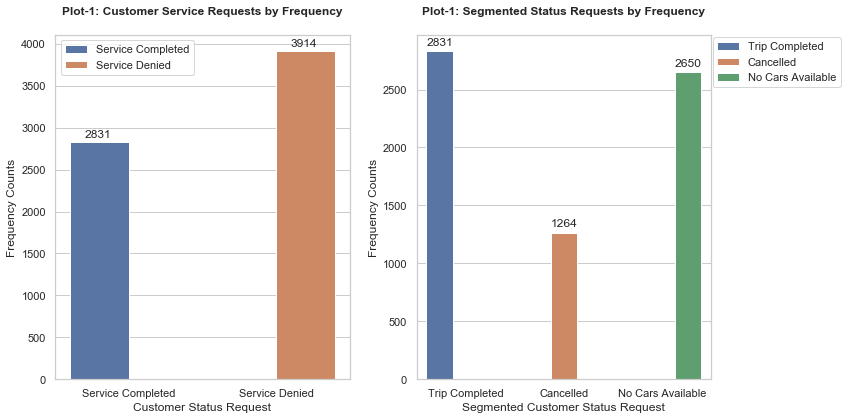

In [28]:
#Plotting Over all Service [Requests Denied vs. Requests Serviced counts]
sns.set()
sns.set(style="whitegrid")

# Set the Subplots. 
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Create a dataframe for the requests counts.
df_counts = uber_data[['Request_Id','Service_Status','Status']]

# Draw countplots for Service and Status Requests.
sns.countplot(x="Service_Status", hue="Service_Status", data=df_counts,ax=ax1)
sns.countplot(x='Status',hue="Status",data=df_counts,ax=ax2)

# Customize,Title,legends,annotations for subplot -1
ax1.set_title('Plot-1: Customer Service Requests by Frequency',
                fontdict={'fontsize':12,'fontweight':'bold'},loc='center',
                pad=20) 
ax1.set(xlabel='Customer Status Request',ylabel='Frequency Counts')
ax1.legend()
for p in ax1.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax1.annotate('{:.0f}'.format(height), (width+0.1, height+50))

# Customize,Title,legends,axis and annotations for subplot -2         
ax2.set_title('Plot-1: Segmented Status Requests by Frequency',
                fontdict={'fontsize':12,'fontweight':'bold'},loc='center',
                pad=20) 
ax2.set(xlabel='Segmented Customer Status Request',
        ylabel='Frequency Counts')
ax2.legend(loc='center right', bbox_to_anchor=(1.46, 0.92), ncol=1)              
for p in ax2.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax2.annotate('{:.0f}'.format(height), (width, height+50))

# Draw plots
plt.tight_layout()
plt.show()

### **Observations**<br>
>- The total number customer service requests  which are successfuly completed are only `2831` while the number of request were denied are `3914` to due to cancellaton or non-availability of cars.
>-  In the segmented status request, the `'Trip Completed'` are only `2831` while the number of request were `Cancelled` or `No cars available` are `1264` and `2650` respectively.
### **Inferences**<br>
> - The number of Service status requested which are completed are less than numbers rejected.
> - The conclusion for segmented overall requested for `"Trip Completed"` is less than numbers for `Cancellation` and `No Cars Available`

#### Plot 2 - Percentage of Service Requests and Segment wise Status Requests 

  - A Plot to analyse the  percentages of `service request status` , i.e. the percentage wise `service request completed` against the `service request denied`.
 - A plot to analyse segmented service status based on 'Trip Completed', 'Cancellation' and 'No Cars Available' Status in percentage.

In [29]:
##Plotting Over all Percentage of Service Status Requests.

#Percentage by Service Staus

# Slice the columns from master uber data.
df_percentage_counts = uber_data[['Request_Id','Service_Status','Status']]
# calculate percentages for service_status
df_ss_percentage = df_percentage_counts[["Request_Id",'Service_Status']]
df_ss_percentage = df_percentage_counts.groupby('Service_Status')['Request_Id']\
                                                   .count().reset_index()

df_ss_percentage['percentage'] = (100*df_ss_percentage['Request_Id'])/ \
                                sum(df_ss_percentage['Request_Id'])
print(df_ss_percentage)

#Percentage by Segmented Service Staus
df_percentage_counts = uber_data[['Request_Id','Service_Status','Status']]
# calculate percentages for service_status
df_s_percentage = df_percentage_counts.groupby('Status')['Request_Id']\
                                                   .count().reset_index()
df_s_percentage['percentage'] = (100*df_s_percentage['Request_Id'])/ \
                                sum(df_s_percentage['Request_Id'])
print()
print(df_s_percentage)

      Service_Status  Request_Id  percentage
0  Service Completed        2831       41.97
1     Service Denied        3914       58.03

              Status  Request_Id  percentage
0          Cancelled        1264       18.74
1  No Cars Available        2650       39.29
2     Trip Completed        2831       41.97


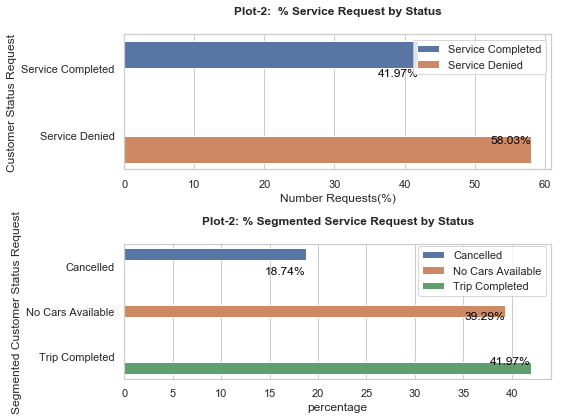

In [30]:
#Plotting a bar plot for Percentage of Service Status & Segmented status Requests. 
sns.set()
sns.set(style="whitegrid")
# Set the Subplots. 
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# Draw countplots for Service and Status Requests.
sns.barplot(y="Service_Status",x="percentage", 
              hue="Service_Status", 
            data=df_ss_percentage,ax=ax1)
sns.barplot(y='Status',x="percentage",
        hue="Status",
       data=df_s_percentage,ax=ax2)

# Customize,Title,legends,annotations for subplot -1
ax1.set_title('Plot-2:  % Service Request by Status',
               fontdict={'fontsize':12,'fontweight':'bold'},loc='center',
                pad=20) 
ax1.set(ylabel='Customer Status Request',
        xlabel='Number Requests(%)')
ax1.legend()
for index,row in df_ss_percentage.iterrows():
    ax1.text(y=row.name,x=row.percentage,s='{:}%'.format(round(row.percentage,2)),\
                                       color='black',ha='right',va='top')

# Customize,Title,legends,axis and annotations for subplot -2         
ax2.set_title('Plot-2: % Segmented Service Request by Status',
                fontdict={'fontsize':12,'fontweight':'bold'},loc='center',
                pad=20) 
ax2.set(ylabel='Segmented Customer Status Request',
        label='Number Requests(%)')
for index,row in df_s_percentage.iterrows():
    ax2.text(y=row.name,x=row.percentage,s='{:}%'.format(round(row.percentage,2)),\
                                       color='black',ha='right',va='top')
ax2.legend(loc='center right', bbox_to_anchor=(1.0, 0.80), ncol=1)


# Draw plots
plt.tight_layout()
plt.show()

### **Observations**<br>
>- The percentage wise service requests  for Service request completed is ***`41.97%`*** while service request were denied are ***`58.03%`***. 
>-  Meanwhile, the percentage segment wise request status are
    - `Trip Completed` - ***`41.97%`***
    - `Cancelled`  ***`18.74%`***
    - `No cars available` - ***`39.29%`*** <br>
    
### **Inferences**<br>
> - The Percentage shows the requests completed are less than numbers rejected.
> - The percentage requests for`"Trip Completed"` is less than numbers for `Cancellation` and `No Cars Available`.

#### Plot 3 - Rate of customer service requests by pick up points.

 - A plot to analyse the over all percentage of service requests by pickup location i.e., either `'Airport'` or from  `'City'`. 

In [31]:
#Plotting on counts of customer requests from a pickup point say from Airport.

df_pickup_group = uber_data.groupby(['Service_Status','Pickup_Point']).count().\
                                                            reset_index()
df_pickup_group
df_pickup_percentage = df_pickup_group[['Service_Status','Pickup_Point','Request_Id']]

df_pickup_percentage['percentage'] = (100*df_pickup_percentage['Request_Id'])/ \
                                sum(df_pickup_percentage['Request_Id'])
df_pickup_percentage

# Split the data frame to two one each for Airport and city.

df_pickup_airport = df_pickup_percentage\
                    .loc[df_pickup_percentage['Pickup_Point'] == 'Airport',:]

df_pickup_city = df_pickup_percentage\
                    .loc[df_pickup_percentage['Pickup_Point'] == 'City',:] 
print(df_pickup_airport)
print()
print(df_pickup_city)

      Service_Status Pickup_Point  Request_Id  percentage
0  Service Completed      Airport        1327       19.67
2     Service Denied      Airport        1911       28.33

      Service_Status Pickup_Point  Request_Id  percentage
1  Service Completed         City        1504       22.30
3     Service Denied         City        2003       29.70


In [32]:
#Plot Number of request entertained or denied from Air port to City and vice Versa.
# using subplot to display


######################################
# Common Function for Label Annotation
######################################

def annotation(ax):
    rects = ax.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 5
        if x_value < 0:
            space *= -1
            ha = 'right'
            va = 'top'
        
        label = "{:.2f}%".format(y_value)
         
        # Create annotation
        ax.annotate(label,                     # Use `label` as label
                   (x_value, y_value),         # Place label at end of the bar
                    xytext=(0, space),         # Vertically shift label by `space`
                    textcoords="offset points",# Interpret `xytext` as offset in points
                    ha='center',               # Horizontally center label
                    va=va)                     # Vertically align label differently 
                                               # for positive and negative values.

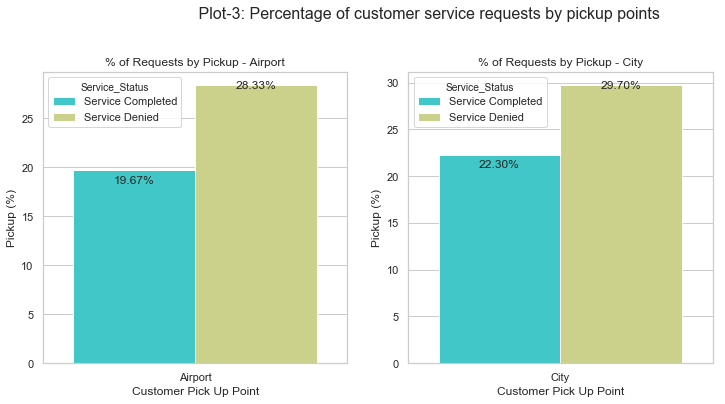

In [33]:
################################ 
# Plot Bar charts
# ##############################

################################
# General Settings.
################################
sns.set()
sns.set(style="whitegrid")

# Create sub plots.
fig, axarr = plt.subplots(1,2,figsize=(12,6))


#set context.

sns.set_context(font_scale=2,rc={"font.size":12,\
                                 "axes.labelsize":12})
# axes styles.
sns.axes_style({'xtick.direction': 'out'})


# Title

# Set the title of bar plots
plt.subplots_adjust(top=0.8)
fig.suptitle(" Plot-3: Percentage of customer service requests by pickup points",
              x=0.3, y=.95, horizontalalignment='left',
               verticalalignment='top', fontsize = 16)


###################################
#Plot-1 for Airport
###################################

# Draw bar plot for Airport
ax = sns.barplot(x='Pickup_Point',y='percentage',\
                                          data=df_pickup_airport,\
                                          hue='Service_Status',\
                                          palette='rainbow',\
                                          ax=axarr[0])

# Titles 
axarr[0].set_title('% of Requests by Pickup - Airport')
axarr[0].set_xlabel('Customer Pick Up Point')
axarr[0].set_ylabel('Pickup (%)')
 
# Annotate Data points
annotation(axarr[0])


###################################
#Plot-1 for Airport
###################################

# Draw bar plot for City.
sns.barplot(x='Pickup_Point',y='percentage',\
                                          data=df_pickup_city,\
                                          hue='Service_Status',\
                                          palette='rainbow',\
                                          ax=axarr[1])

# Titles 
axarr[1].set_title('% of Requests by Pickup - City')
axarr[1].set_xlabel('Customer Pick Up Point')
axarr[1].set_ylabel('Pickup (%)')

# Annotate for Plot-2
annotation(axarr[1])
plt.show()

### **Observations**<br>
>- The plot-3 shows the service requests completed and denied by based on the pick up location such as Airport and City respectively, in percentages.
### **Inferences**<br>
>- The customer services requests either honoured and rejected with slightly increased rate from City rather than from Airport, though only marginally. 
>- Please note the request rejected are `28.33%` and `29.70%` from Airport and City respectively.

#### Plot 4 - Rate of Segmented customer service requests by pick up points.

 - A plot to analyse the over all percentage of segmented service requests such as `'Trip Completed'`, `'Cancelled'` and `'No cars available'` by pickup location i.e., either `'Airport'` or from  `'City'`. 

In [34]:
##Plotting on % segmented Status request from a pickup point say from Airport.
df_pickup_group = uber_data.groupby(['Status','Pickup_Point']).count().\
                                                            reset_index()
df_pickup_group
df_pickup_percentage = df_pickup_group[['Status','Pickup_Point','Request_Id']]

# Split the data frame to two one each for Airport and city.
df_status_airport = df_pickup_percentage\
                    .loc[df_pickup_percentage['Pickup_Point'] == 'Airport',:]
df_status_airport['percentage'] = (100*df_status_airport['Request_Id'])/ \
                                   sum(df_status_airport['Request_Id'])
df_status_city = df_pickup_percentage\
                    .loc[df_pickup_percentage['Pickup_Point'] == 'City',:] 
df_status_city['percentage'] = (100*df_status_city['Request_Id'])/ \
                                sum(df_status_city['Request_Id'])
#verify results.
print(df_status_airport)
print()
print(df_status_city)

              Status Pickup_Point  Request_Id  percentage
0          Cancelled      Airport         198        6.11
2  No Cars Available      Airport        1713       52.90
4     Trip Completed      Airport        1327       40.98

              Status Pickup_Point  Request_Id  percentage
1          Cancelled         City        1066       30.40
3  No Cars Available         City         937       26.72
5     Trip Completed         City        1504       42.89


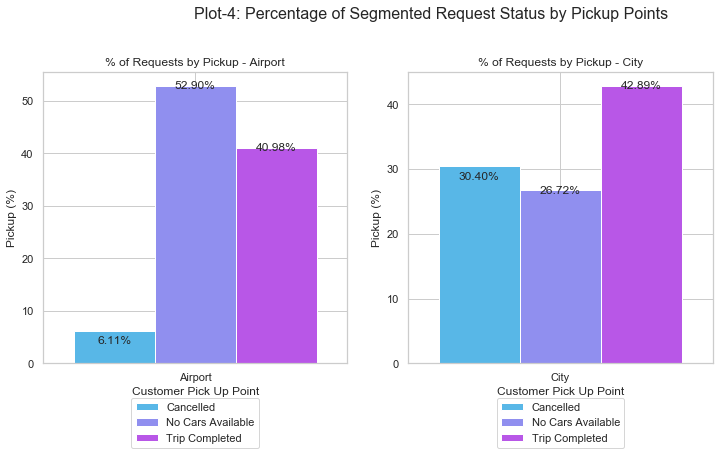

In [35]:
################################
# General Settings.
################################
sns.set()
sns.set(style="whitegrid")
# Create sub plots.
fig, axarr = plt.subplots(1,2,figsize=(12,6))
#set context.
sns.set(style="whitegrid")
sns.set_context(font_scale=2,rc={"font.size":12,\
                                 "axes.labelsize":12})
# axes styles.
sns.axes_style({'xtick.direction': 'out'})
# Set the title of bar plots
plt.subplots_adjust(top=0.8)
fig.suptitle("Plot-4: Percentage of Segmented Request Status by Pickup Points",
              x=0.3, y=.95, horizontalalignment='left',
               verticalalignment='top', fontsize = 16)


###################################
#Plot-1 for Airport
###################################

# Draw bar plot for Airport
ax = sns.barplot(x='Pickup_Point',y='percentage', 
                                          data=df_status_airport,
                                          hue='Status',
                                          palette='cool',
                                          ax=axarr[0])
# Titles 
axarr[0].set_title('% of Requests by Pickup - Airport')
axarr[0].set_xlabel('Customer Pick Up Point')
axarr[0].set_ylabel('Pickup (%)')

# Move the legend down center.
handles, labels = axarr[0].get_legend_handles_labels()
lgd = axarr[0].legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
axarr[0].grid('on')

# Annotate Data points
annotation(axarr[0])

###################################
#Plot-1 for Airport
###################################
# Draw bar plot for City.
sns.barplot(x='Pickup_Point',y='percentage',
                                          data=df_status_city,
                                          hue='Status',
                                          palette='cool',
                                          ax=axarr[1])

# Titles 
axarr[1].set_title('% of Requests by Pickup - City')
axarr[1].set_xlabel('Customer Pick Up Point')
axarr[1].set_ylabel('Pickup (%)')

# move the legend down center.
handles, labels = axarr[1].get_legend_handles_labels()
lgd =axarr[1].legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
axarr[1].grid('on')

# Annotate for Plot-2
annotation(axarr[1])
plt.show()

### **Observations**<br>
>- The plot-4 shows the Segmented service requests entertained by user based on the pick up location such as Airport and City respectively, in percentages.
### **Inferences**<br>
>- The overall the trip completion status remains same for Airport and City.
>- The number of cancellation were less from Airport than City
>- However, the number of  non-availability of cars from city to airport is more than vice versa.

#### Plot-5 - Segmented Request Status based on Time Slot Window. 

>- A plot to analyse the over all segment status based on the Timeslot . i.e. Available, non- available or cancellled based time slots like Morning peak hours, Late noon hours, Late evening peak hours, Night Midnight hours etc.,<br>
 
>- A ***stacked bar chart*** is generaetd to visualise this. 

In [36]:
## Create a slice from uber data to plot the data.
df_slice = uber_data[['Status','Window_Time','Request_Id']]

## group the data based on status and time-slot
df_time_status = df_slice.groupby(['Status','Window_Time'])['Request_Id']\
                                                .count().reset_index()
df_time_status

,Status,Window_Time,Request_Id
0,Cancelled,Early Evening Hours,102
1,Cancelled,Late Evening Peak Hours,129
2,Cancelled,Late Noon Hours,63
3,Cancelled,Morning Peak Hours,729
4,Cancelled,Night Midnight Hours,241
5,No Cars Available,Early Evening Hours,648
6,No Cars Available,Late Evening Peak Hours,1057
7,No Cars Available,Late Noon Hours,175
8,No Cars Available,Morning Peak Hours,387
9,No Cars Available,Night Midnight Hours,383


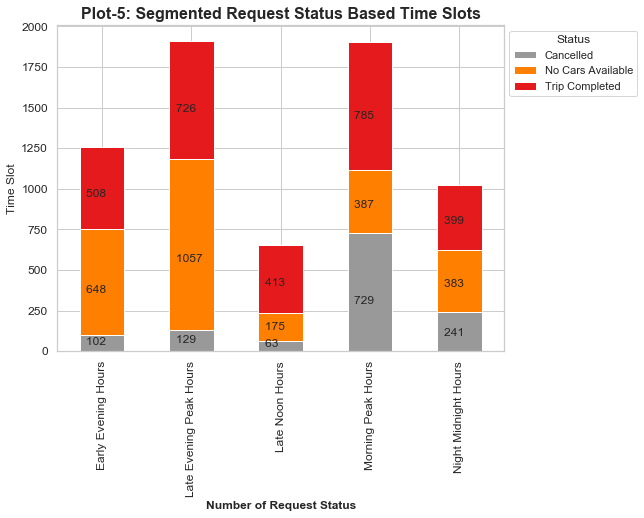

In [37]:
sns.set()
sns.set(style="whitegrid")
# Unstack the data frame to plot.

df = df_slice.groupby(['Status','Window_Time'])['Request_Id']\
                    .count().unstack('Status')

# Draw Matplot lib stacked bar.

ax = df.plot(kind='bar',
             stacked=True,
             grid=True,
             figsize=(8,6),
             colormap=plt.cm.Set1_r,
             fontsize=12)

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-5: Segmented Request Status Based Time Slots",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Time Slot",fontsize=12)
ax.set_xlabel("Number of Request Status",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))


# Annotate the stacked bar plot

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} '.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

# Display the Stacked Bar Plot.
plt.show()

### **Observations**<br>
>- The plot-5 for overall segmented service  requests,(both from Airport and city), entertained with the time slot groups like `Early Morning Hours`,`Late Evening Peak Hours`,`Late Noon Hours`,`Morning Peak Hours` and `Night Midnight hours` respectively.<br>
### **Inferences**<br>
>- During ***`Late Evening Peak hours`*** window there were ***Maximum `No cars available`***.
>- ***`Number of cancellation`*** were ***Maximum*** during ***`Morning Peak Hours`***.
>- ***Maximum `Trips are completed`*** during ***`Morning Peak Hours`*** 
>- The ***least number of 'Trip Completed'*** during ***`Night Midnight Hours`***
>- There were ***least number of `cancellation`*** and ***`No Cancellation`***  during ***`Late noon Hours'***.

#### Plot-6 - Segmented Request Status based on Time Slot Window - Using CatPlot

In [38]:
df_slice = uber_data[['Status','Window_Time','Request_Id']]
df_slice = df_slice.groupby(['Window_Time','Status'])['Request_Id'].count().reset_index()
df_slice[df_slice.Window_Time == 'Late Evening Peak Hours']

,Window_Time,Status,Request_Id
3,Late Evening Peak Hours,Cancelled,129
4,Late Evening Peak Hours,No Cars Available,1057
5,Late Evening Peak Hours,Trip Completed,726


<Figure size 576x432 with 0 Axes>

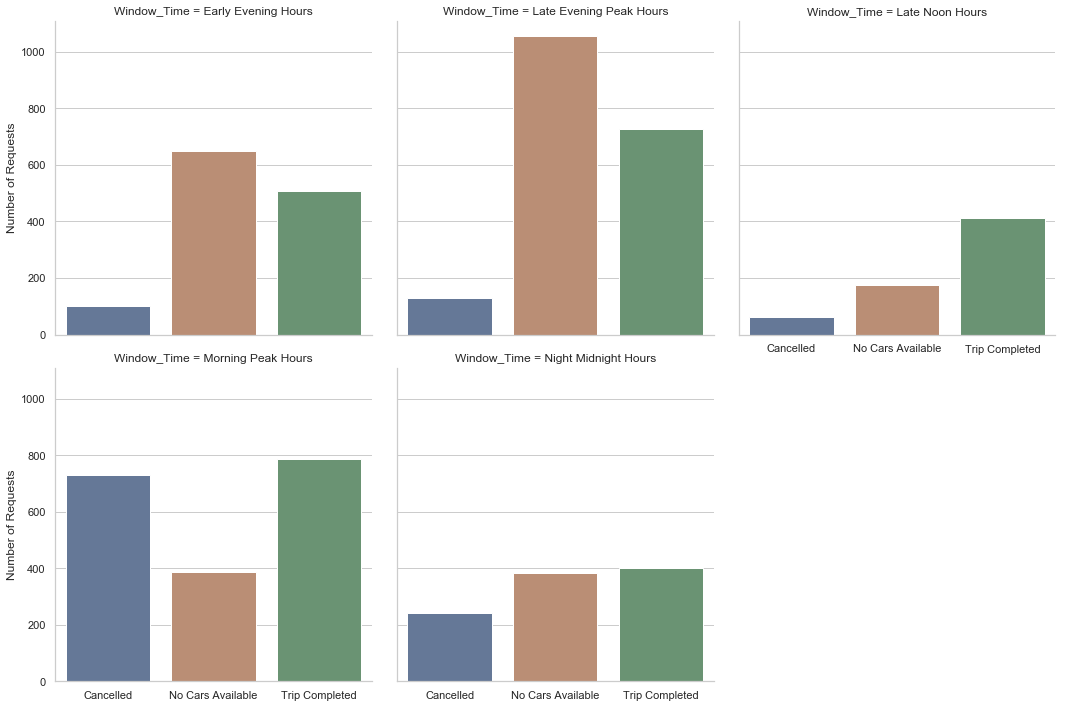

In [39]:
sns.set()
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
g = sns.catplot(x='Status',y='Request_Id',col='Window_Time',
            kind='bar',data=df_slice,ci=None,saturation=0.5,col_wrap=3,
            aspect=1.0)
g.set_axis_labels("","Number of Requests")
plt.tight_layout()
plt.show()

#### Plot-7 - Segmented Request Status based on Time Slot Window for pick up point Airport . 

>- A plot to analyse the over all segment status based on the Timeslot . i.e. Available, non- available or cancellled based time slots like Morning peak hours, Late noon hours, Late evening peak hours, Night Midnight hours etc. but only for pickup point Airport<br>
 
>- A ***stacked bar chart*** is generated to visualise this. 

In [40]:
## Create a slice from uber data to plot the data.
df_slice = uber_data[['Status','Window_Time','Request_Id',"Pickup_Point"]]

#Pickup Points - Airport & City
df_time_status_airport = df_slice.loc[(df_slice.Pickup_Point=="Airport"),:]
df_time_status_city = df_slice.loc[(df_slice.Pickup_Point=="City"),:]

## group the data based on status and time-slot
df_time_status_airport = df_time_status_airport\
                        .groupby(['Status','Window_Time'])['Request_Id']\
                                                   .count().unstack("Status")


df_time_status_city = df_time_status_city\
                       .groupby(['Status','Window_Time'])['Request_Id']\
                                                .count().unstack("Status")
print(df_time_status_airport)
print()
print(df_time_status_city)

Status                   Cancelled  No Cars Available  Trip Completed
Window_Time                                                          
Early Evening Hours             59                546             245
Late Evening Peak Hours         75                933             360
Late Noon Hours                 30                 52             184
Morning Peak Hours              28                 31             350
Night Midnight Hours             6                151             188

Status                   Cancelled  No Cars Available  Trip Completed
Window_Time                                                          
Early Evening Hours             43                102             263
Late Evening Peak Hours         54                124             366
Late Noon Hours                 33                123             229
Morning Peak Hours             701                356             435
Night Midnight Hours           235                232             211


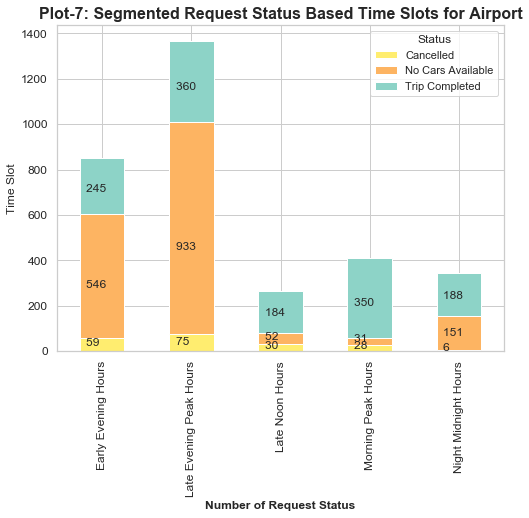

In [41]:
# Draw Matplot lib stacked bar.
sns.set()
sns.set(style="whitegrid")

# Plot the stacked bar.
ax=df_time_status_airport.plot(kind='bar',
                            stacked=True,
                            grid=True,
                            figsize=(8,6),
                            colormap=plt.cm.Set3_r,
                            fontsize=12)

#Set the Title for the plot,labels for the stacked bars.
titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-7: Segmented Request Status Based Time Slots for Airport",
                   fontdict=titlefonts)
fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Time Slot",fontsize=12)
ax.set_xlabel("Number of Request Status",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

# Annotate the stacked bar plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} '.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

# Display the Stacked Bar Plot.
plt.show()

### **Observations**<br>
>- The plot-7 shows the number of request occur during each Time slots from Airport<br>
### **Inferences**<br>
>- Maximum number of Requests `No Cars Available`,`Trips Completed` and `Cancelled` are happening during `Late Evening Peak hours` from Airport to City. (933, 360,75) 
>- Least number of `Trips Completed` is during`Late  Noon Hours` - 184.
>- Least number of `Cancellation` is during `Night Midnight Hours` - 6.
>- Least number of `No Cars Available` is during `Morning Peak Hours' - 28.

#### Plot-8 - Segmented Request Status based on Time Slot Window for pick up point City . 

>- A plot to analyse the over all segment status based on the Timeslot . i.e. Available, non- available or cancellled based time slots like Morning peak hours, Late noon hours, Late evening peak hours, Night Midnight hours etc. but only for pickup point City<br>
 
>- A ***stacked bar chart*** is generated to visualise this. 

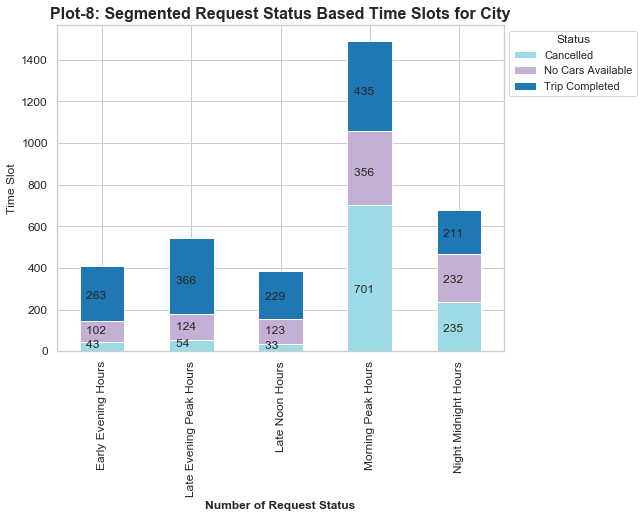

In [42]:
# Draw Matplot lib stacked bar.
sns.set()
sns.set(style="whitegrid")

# Plot the stacked bar.
ax=df_time_status_city.plot(kind='bar',
                            stacked=True,
                            grid=True,
                            figsize=(8,6),
                            colormap=plt.cm.tab20_r,
                            fontsize=12)

#Set the Title for the plot,labels for the stacked bars.
titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-8: Segmented Request Status Based Time Slots for City",
                   fontdict=titlefonts)
fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Time Slot",fontsize=12)
ax.set_xlabel("Number of Request Status",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

# Annotate the stacked bar plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} '.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

# Display the Stacked Bar Plot.
plt.show()

### **Observations**<br>
>- The plot-8 shows the number of request occur during each Time Window from City<br>
### **Inferences**<br>
>- Maximum number of Requests `No Cars Available`, `Cancellation` and `Tripe Completed` are happening during `Morning  Peak hours` from City to Airport. (356, 701, 435) from City.
>- Least `Cancellation` are during `Late Noon Hours`.

### Demand And Supply

Following analysis are carried out and visualisation (Line Plot) plots are drawn to get  insight in to the Uber Demand and Supply of cab to and from Airport and city respectively.

>1. Identify and plot Total Demand & Supply Trends - by hourly basis
    - This is based on all the Service Requests on hourly basis.
    - This includes all the pickup points.

>2. Identify and plot Total Demand & Supply - GAP Trends - by hourly basis 
    - This includes all the pick up points.
    - This includes all Service Requests.
    
>3. Identify and plot Total Demand & Supply - GAP  - by Time slots
    - This includes all the pick up points
    - This includes all the Service Requests.
    
>4. Identify and Plot Total Demand & Supply - Gap  - by Time slots & Airport 
    - This includes only the pickup point Airport
    - This includes all the Service Requests
    
>5. Identify and Plot Total Demand & Supply - Gap  - by Time slots & City 
    - This includes only the pickup point City.
    - This includes all the Service Requests.

###  Plot-9.1: Plot Demand & supply Trends - On Hourly Basis

In [43]:
# ## Calculate the hourly demand and supply.
# Hourly demand - The number of requests made in hourly basis

hourly_demand_supply = uber_data.groupby(['Request_Hour','Status'])['Request_Id'].\
                                   count().reset_index()

In [44]:
hourly_demand_supply.head(10)

,Request_Hour,Status,Request_Id
0,0,Cancelled,3
1,0,No Cars Available,56
2,0,Trip Completed,40
3,1,Cancelled,4
4,1,No Cars Available,56
5,1,Trip Completed,25
6,2,Cancelled,5
7,2,No Cars Available,57
8,2,Trip Completed,37
9,3,Cancelled,2


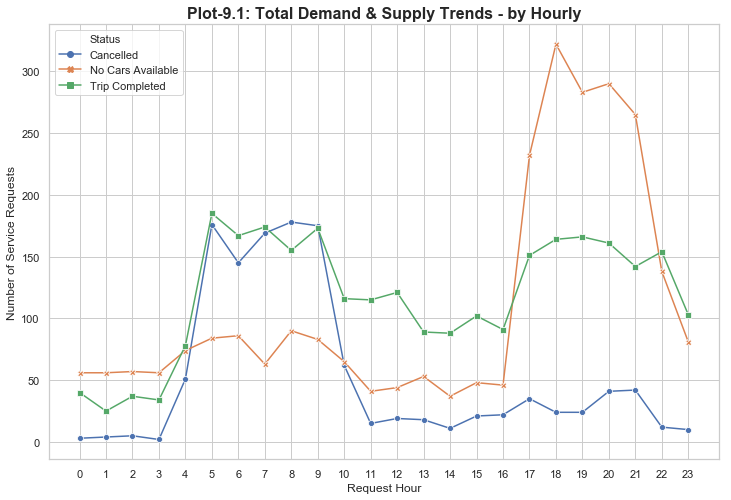

In [45]:
### sns.set()
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))

# Draw Line plot for the multiline plot.

ax =sns.lineplot(x="Request_Hour", y="Request_Id", hue="Status",
             style='Status',markers=True, dashes=False, data=hourly_demand_supply)

# Set the Title for the Line plot.
titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-9.1: Total Demand & Supply Trends - by Hourly",
                   fontdict=titlefonts)

# Set the labels to Line x axis and y axis.

ax.set_xticks(np.arange(0,24,1))
fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Number of Service Requests",fontsize=12)
ax.set_xlabel("Request Hour",fontsize=12)
plt.show()

### **Observations**<br>
>- The plot-9.1 (line plot) shows overall hourly requests ,(both from Airport and city) trends , by `'Trip Completed'`, `'Cancelled'` or `'No Cars Available'`.
 
### **Inferences**<br>

>- It is observed that `high number of requests were denied due to  'No cars Available' between evening 17pm and 21pm`.
>- Also, `high number of cancellation were between morning 04am and 11am`.
>- There is `high number of Requests were honoured (Trip Completed) during Morning hours (mostly between 4am and 10am) and again between 4pm and night 10pm`.
>- `Least number of cancellation are on and after 11pm`. 

###  Plot-9.2: Plot Total Demand & Supply - GAP - on hourly basis.<br>

In [46]:
#Find out the gap between supply and demand and show the same using plots

# Identify the hourly demand across all requests and pickup locations.
hourly_demand_total = uber_data.groupby("Request_Hour")['Request_Id']\
                                               .count().reset_index()

# Identify only the hourly demand across ONLY request which are completed
# i.e., where status is 'Trip Completed' means - service supplied.

hourly_supply_total = uber_data.loc[uber_data['Status'] == 'Trip Completed',:]
hourly_supply_total = hourly_supply_total\
                      .groupby("Request_Hour")['Request_Id']\
                      .count().reset_index()

# Merge the two data frame together to get the total demand and supply together.

hourly_demand_supply_gap =\
   pd.merge(hourly_demand_total,
            hourly_supply_total,
            how='inner',
            on='Request_Hour')

#Rename the column Request_Id_x and Request_Id_y to Total_Demand and Total_Supply.
hourly_demand_supply_gap.rename(columns={"Request_Id_x":"Total_Demand",
                                         "Request_Id_y":"Total_Supply"},
                                         inplace=True)

# Now add a new column Total_Gap = Total_Demand - Total_Supply
hourly_demand_supply_gap['Total_Gap'] =\
    hourly_demand_supply_gap['Total_Demand'] -  hourly_demand_supply_gap['Total_Supply']

In [47]:
hourly_demand_supply_gap.head()

,Request_Hour,Total_Demand,Total_Supply,Total_Gap
0,0,99,40,59
1,1,85,25,60
2,2,99,37,62
3,3,92,34,58
4,4,203,78,125


In [48]:
hourly_demand_supply_gap.to_csv("Data/hourly_demand_supply_gap.csv")

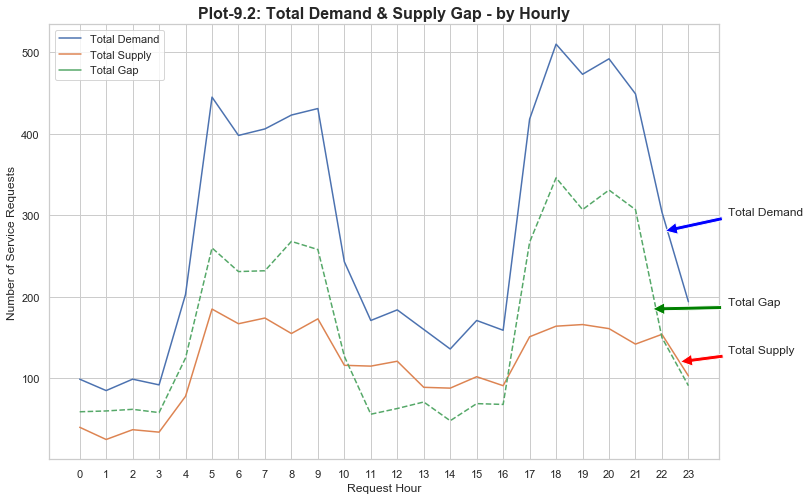

In [49]:
sns.set()
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))

def annotate_arrows(title,xy:tuple,xytext:tuple,color):
    #Annotate Arrows for Total Demand.
    ax.annotate(text=title,xy=xy,xytext=xytext,
            arrowprops=dict(facecolor=color, shrink=0.05),
            )
    
# Draw lineplot for the multiline plot.

ax =sns.lineplot(x="Request_Hour", y="Total_Demand",
             markers=True, dashes=False, data=hourly_demand_supply_gap,
             label="Total Demand")

annotate_arrows("Total Demand",(22,280),(24.5,300),"Blue")

ax =sns.lineplot(x="Request_Hour", y="Total_Supply",  
             markers=True, dashes=False, data=hourly_demand_supply_gap,
             label="Total Supply")

#Annotate Arrows for Total Supply.
annotate_arrows("Total Supply",(22.6,120),(24.5,130.5),"Red")

ax =sns.lineplot(x="Request_Hour", y="Total_Gap", 
             markers=["o"], dashes=False, data=hourly_demand_supply_gap,
             label="Total Gap")

#Annotate arrows for Total Gap.
annotate_arrows("Total Gap",(21.5,185),(24.5,189.5),"Green")

# differentiate Gap with line style.
ax.lines[2].set_linestyle("--")

# Set the Title,labels for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-9.2: Total Demand & Supply Gap - by Hourly",
                   fontdict=titlefonts)
fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_xticks(np.arange(0,24,1))
ax.set_ylabel("Number of Service Requests",fontsize=12)
ax.set_xlabel("Request Hour",fontsize=12)

plt.show()

### **Observations**<br>
>- The plot-9.2 (line plot) shows overall demand and supply ,(both from Airport and city), and the GAP between demand and supply during each hour.
 
### **Inferences**<br>

>-  The Total Demand is very high between morning 3am and 11am and also between evening 4pm and 10pm.
>- The total supply is more during morning hours between 3am and 9am but gradually it comes down during noon hours again picks up around 4pm till 10pm.
>- it is very clear from the plot the ***`gap is very huge during Morning hours 3AM and 10AM and again between 4pm and 10pm due to huge demand and not enough supply of cabs`*** during the time period.

###  Plot-9.3: Plot Total Demand & Supply - GAP - Time Slots <br>

In [50]:
#Find out the gap between supply and demand and show the same using plots

# Identify the Time slot wise demand across all requests and pickup locations.

#Find out the total demand or Total Requests based on Timeslots.

# Group the data on Time slots (Window Time) and get the Total requests.
timeslot_demand_total = uber_data.groupby("Window_Time")['Request_Id']\
                                               .count().reset_index()

# Find out the Total Supply.

# Identify only the hourly demand across ONLY request which are completed
# i.e., where status is 'Trip Completed' means - service supplied.

timeslot_supply_total = uber_data.loc[uber_data['Status'] == 'Trip Completed',:]
timeslot_supply_total = timeslot_supply_total.groupby("Window_Time")['Request_Id']\
                                                         .count().reset_index()

# Merge the two data frame together to get the total demand and supply together.

timeslot_demand_supply_gap =\
   pd.merge(timeslot_demand_total,timeslot_supply_total,how='inner',on='Window_Time')

#Rename the column Request_Id_x and Request_Id_y to Total_Demand and Total_Supply.
timeslot_demand_supply_gap.rename(columns={"Request_Id_x":"Total_Demand",
                                         "Request_Id_y":"Total_Supply"},
                                         inplace=True)

# Now add a new column Total_Gap = Total_Demand - Total_Supply
timeslot_demand_supply_gap['Total_Gap'] =\
   timeslot_demand_supply_gap['Total_Demand'] - timeslot_demand_supply_gap['Total_Supply']

timeslot_demand_supply_gap

,Window_Time,Total_Demand,Total_Supply,Total_Gap
0,Early Evening Hours,1258,508,750
1,Late Evening Peak Hours,1912,726,1186
2,Late Noon Hours,651,413,238
3,Morning Peak Hours,1901,785,1116
4,Night Midnight Hours,1023,399,624


In [51]:
timeslot_demand_supply_gap.to_csv("./Data/timeslot_demand_supply_gap.csv")

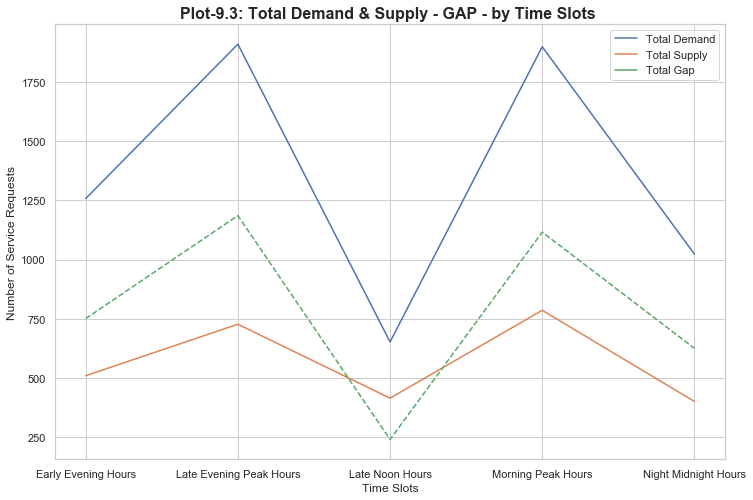

In [52]:
sns.set()
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))

# Draw tsplot for the multiline plot.
hues= ['Early Evening Hours',
       'Late Evening Peak Hours',
       'Late Noon Hours',
       'Morning Peak Hours',
       'Night Midnight Hours'
      ]

ax =sns.lineplot(x="Window_Time", y="Total_Demand",
             markers=True, dashes=False, data=timeslot_demand_supply_gap,
             label="Total Demand")
ax =sns.lineplot(x="Window_Time", y="Total_Supply",
             markers=True, dashes=False, data=timeslot_demand_supply_gap,
             label="Total Supply")
ax =sns.lineplot(x="Window_Time", y="Total_Gap", 
             markers=True, dashes=False, data=timeslot_demand_supply_gap,
             label="Total Gap")

# differentiate Gap with line style.
ax.lines[2].set_linestyle("--")

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-9.3: Total Demand & Supply - GAP - by Time Slots ",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Number of Service Requests",fontsize=12)
ax.set_xlabel("Time Slots",fontsize=12)

plt.show()

### **Observations**<br>
>- The plot-9.3 (line plot) shows overall demand and supply ,(both from Airport and city), and the GAP between demand and supply on different time slots.
 
### **Inferences**<br>

>-  The Total Demand is very high between ***`Late Evening Peak Hours`*** and ***`Morning Peak Hours`***.
>- The total supply is also more during ***`Late Evening Peak Hours`*** and ***`Morning Peak Hours`***. However, the gap is  huge during this period.
>- it is very clear from the plot the ***`gap is very huge during Time slots Morning Peak hours and again Late Evening Peak Hours due to huge demand and not enough supply of cabs`*** during the time period.
>- The gap is very low during Late Noon hours.

###  Plot-9.4: Plot Total Demand & Supply - Gap  - on Time slots  & pickup point  Airport.<br>

In [53]:
#Find out the gap between supply and demand and show the same using plots
# Identify the Total Demands.
# Total the number of request group by the Timeslots and Pickup points.

timeslot_demand_airport_total = uber_data\
                               .groupby(["Window_Time","Pickup_Point"])['Request_Id']\
                               .count().reset_index()

# Filter only for Air port Pick up Point.for Total demands.

timeslot_demand_airport_total = timeslot_demand_airport_total\
                     .loc[timeslot_demand_airport_total["Pickup_Point"] == "Airport",:]
timeslot_demand_airport_total

,Window_Time,Pickup_Point,Request_Id
0,Early Evening Hours,Airport,850
2,Late Evening Peak Hours,Airport,1368
4,Late Noon Hours,Airport,266
6,Morning Peak Hours,Airport,409
8,Night Midnight Hours,Airport,345


In [54]:
# # Identify the Total Supply for pickup point Airport.

# Filter only 'Trip Completed' for all request.
# i.e., where status is 'Trip Completed' means - service supplied.

timeslot_supply_airport_total = uber_data.loc[uber_data['Status'] == 'Trip Completed',:]

# Total the number of request group by the Timeslots and Pickup points.

timeslot_supply_airport_total = timeslot_supply_airport_total\
                                .groupby(["Window_Time","Pickup_Point"])['Request_Id']\
                                .count().reset_index()
                                          
#Filter for pickup point Airport for Total Supply.

timeslot_supply_airport_total = timeslot_supply_airport_total\
                     .loc[timeslot_supply_airport_total["Pickup_Point"] == "Airport",:]

timeslot_supply_airport_total

,Window_Time,Pickup_Point,Request_Id
0,Early Evening Hours,Airport,245
2,Late Evening Peak Hours,Airport,360
4,Late Noon Hours,Airport,184
6,Morning Peak Hours,Airport,350
8,Night Midnight Hours,Airport,188


In [55]:
# Merge the two data frame Total Demand & Total Supply

timeslot_demand_supply_airport_gap =\
   pd.merge(timeslot_demand_airport_total,
            timeslot_supply_airport_total,
            how='inner',on=['Window_Time',"Pickup_Point"])

#Rename the column Request_Id_x and Request_Id_y to Total_Demand and Total_Supply.
timeslot_demand_supply_airport_gap\
          .rename(columns={"Request_Id_x":"Total_Demand",
                           "Request_Id_y":"Total_Supply"},
                           inplace=True)

timeslot_demand_supply_airport_gap

,Window_Time,Pickup_Point,Total_Demand,Total_Supply
0,Early Evening Hours,Airport,850,245
1,Late Evening Peak Hours,Airport,1368,360
2,Late Noon Hours,Airport,266,184
3,Morning Peak Hours,Airport,409,350
4,Night Midnight Hours,Airport,345,188


In [56]:
# Now add a new column Total_Gap = Total_Demand - Total_Supply

timeslot_demand_supply_airport_gap['Total_Gap'] =\
   timeslot_demand_supply_airport_gap['Total_Demand'] - \
   timeslot_demand_supply_airport_gap['Total_Supply']

timeslot_demand_supply_airport_gap

,Window_Time,Pickup_Point,Total_Demand,Total_Supply,Total_Gap
0,Early Evening Hours,Airport,850,245,605
1,Late Evening Peak Hours,Airport,1368,360,1008
2,Late Noon Hours,Airport,266,184,82
3,Morning Peak Hours,Airport,409,350,59
4,Night Midnight Hours,Airport,345,188,157


In [57]:
# Save to csv for tableau use.
timeslot_demand_supply_airport_gap.to_csv("./Data/timeslot_demand_supply_airport_gap.csv")

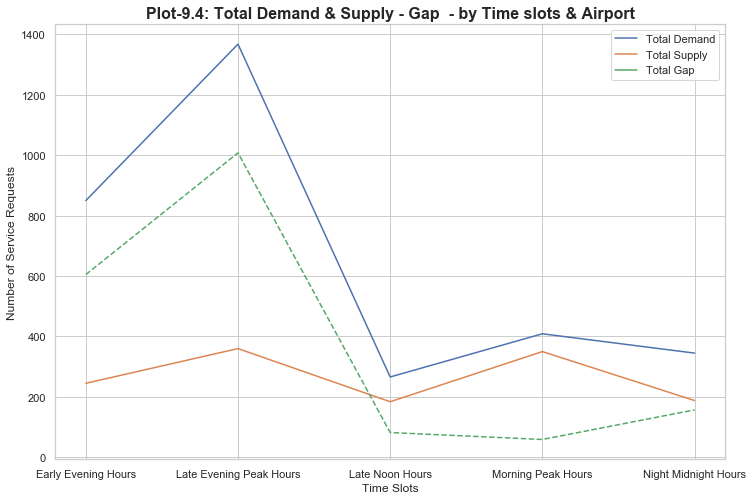

In [58]:
sns.set()
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))

# Draw lineplot for the multiline plot.

ax =sns.lineplot(x="Window_Time", y="Total_Demand",
             markers=True, dashes=False, data=timeslot_demand_supply_airport_gap,
             label="Total Demand")
ax =sns.lineplot(x="Window_Time", y="Total_Supply",
             markers=True, dashes=False, data=timeslot_demand_supply_airport_gap,
             label="Total Supply")
ax =sns.lineplot(x="Window_Time", y="Total_Gap", 
             markers=True, dashes=False, data=timeslot_demand_supply_airport_gap,
             label="Total Gap")

# differentiate Gap with line style.
ax.lines[2].set_linestyle("--")

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}

ax.set_title("Plot-9.4: Total Demand & Supply - Gap  - by Time slots & Airport",
                   fontdict=titlefonts)

# Set the labels to the line plots bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Number of Service Requests",fontsize=12)
ax.set_xlabel("Time Slots",fontsize=12)

plt.show()

In [59]:
timeslot_demand_supply_airport_gap

,Window_Time,Pickup_Point,Total_Demand,Total_Supply,Total_Gap
0,Early Evening Hours,Airport,850,245,605
1,Late Evening Peak Hours,Airport,1368,360,1008
2,Late Noon Hours,Airport,266,184,82
3,Morning Peak Hours,Airport,409,350,59
4,Night Midnight Hours,Airport,345,188,157


###  Plot-9.4: Plot Total Demand & Supply - Gap  - on Time slots  & Airport. - Stacked Bar <br>

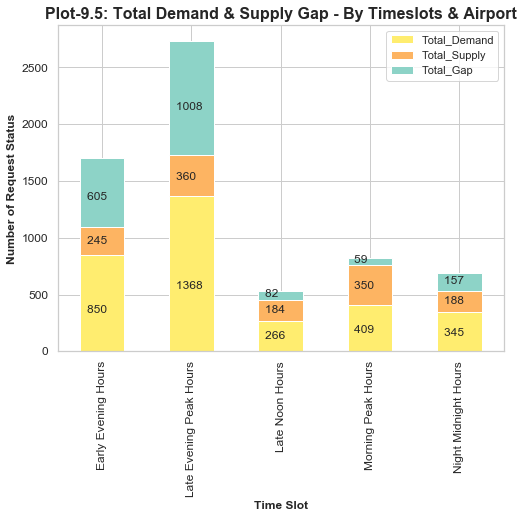

In [60]:
sns.set()
sns.set(style="whitegrid")

# Draw Matplot lib stacked bar.

ax = timeslot_demand_supply_airport_gap.plot(x="Window_Time",
                                             kind='bar',
                                             stacked=True,
                                             grid=True,
                                             figsize=(8,6),
                                             colormap=plt.cm.Set3_r,
                                             fontsize=12)

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-9.5: Total Demand & Supply Gap - By Timeslots & Airport",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_xlabel("Time Slot",fontsize=12,fontdict=fonts)
ax.set_ylabel("Number of Request Status",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))


# Annotate the stacked bar plot

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} '.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

# Display the Stacked Bar Plot.
plt.show()

### **Observations**<br>
>- We have noticed from the earlier finding there is a a huge gap in demand and supply during Late Evening Hours.
>- Th plot 9.4 & 9.5 (line plot and stacked bar plot) depicts Time-supply gap for during different time slots but only for location pickup Airport.
 
### **Inferences**<br>

>- It is evident from the above plots the from Airport , `the GAP is huge during Late Evening hours`. 
>- The `gap is of 1008` requests from Airport towards city not fulfilled.

###  Plot-9.6: Plot Total Demand & Supply - Gap  - on Time slots  & pickup point  City.<br>

In [61]:
#Find out the gap between supply and demand and show the same using plots
# Identify the Total Demands.
# Total the number of request group by the Timeslots and Pickup points.

timeslot_demand_city_total = uber_data\
                               .groupby(["Window_Time","Pickup_Point"])['Request_Id']\
                               .count().reset_index()

# Filter only for City Pick up Point.for Total demands.

timeslot_demand_city_total = timeslot_demand_city_total\
                     .loc[timeslot_demand_city_total["Pickup_Point"] == "City",:]
timeslot_demand_city_total

,Window_Time,Pickup_Point,Request_Id
1,Early Evening Hours,City,408
3,Late Evening Peak Hours,City,544
5,Late Noon Hours,City,385
7,Morning Peak Hours,City,1492
9,Night Midnight Hours,City,678


In [62]:
# # Identify the Total Supply for pickup point City.

# Filter only 'Trip Completed' for all request.
# i.e., where status is 'Trip Completed' means - service supplied.

timeslot_supply_city_total = uber_data.loc[uber_data['Status'] == 'Trip Completed',:]

# Total the number of request group by the Timeslots and Pickup points.

timeslot_supply_city_total = timeslot_supply_city_total\
                                .groupby(["Window_Time","Pickup_Point"])['Request_Id']\
                                .count().reset_index()
                                          
#Filter for pickup point City for Total Supply.

timeslot_supply_city_total = timeslot_supply_city_total\
                     .loc[timeslot_supply_city_total["Pickup_Point"] == "City",:]

timeslot_supply_city_total

,Window_Time,Pickup_Point,Request_Id
1,Early Evening Hours,City,263
3,Late Evening Peak Hours,City,366
5,Late Noon Hours,City,229
7,Morning Peak Hours,City,435
9,Night Midnight Hours,City,211


In [63]:
# Merge the two data frame Total Demand & Total Supply

timeslot_demand_supply_city_gap =\
   pd.merge(timeslot_demand_city_total,
            timeslot_supply_city_total,
            how='inner',on=['Window_Time',"Pickup_Point"])

#Rename the column Request_Id_x and Request_Id_y to Total_Demand and Total_Supply.
timeslot_demand_supply_city_gap\
          .rename(columns={"Request_Id_x":"Total_Demand",
                           "Request_Id_y":"Total_Supply"},
                           inplace=True)

timeslot_demand_supply_city_gap

,Window_Time,Pickup_Point,Total_Demand,Total_Supply
0,Early Evening Hours,City,408,263
1,Late Evening Peak Hours,City,544,366
2,Late Noon Hours,City,385,229
3,Morning Peak Hours,City,1492,435
4,Night Midnight Hours,City,678,211


In [64]:
# Now add a new column Total_Gap = Total_Demand - Total_Supply

timeslot_demand_supply_city_gap['Total_Gap'] =\
   timeslot_demand_supply_city_gap['Total_Demand'] - \
   timeslot_demand_supply_city_gap['Total_Supply']

timeslot_demand_supply_city_gap

,Window_Time,Pickup_Point,Total_Demand,Total_Supply,Total_Gap
0,Early Evening Hours,City,408,263,145
1,Late Evening Peak Hours,City,544,366,178
2,Late Noon Hours,City,385,229,156
3,Morning Peak Hours,City,1492,435,1057
4,Night Midnight Hours,City,678,211,467


In [65]:
timeslot_demand_supply_city_gap.to_csv("./Data/timeslot_demand_supply_city_gap.csv")

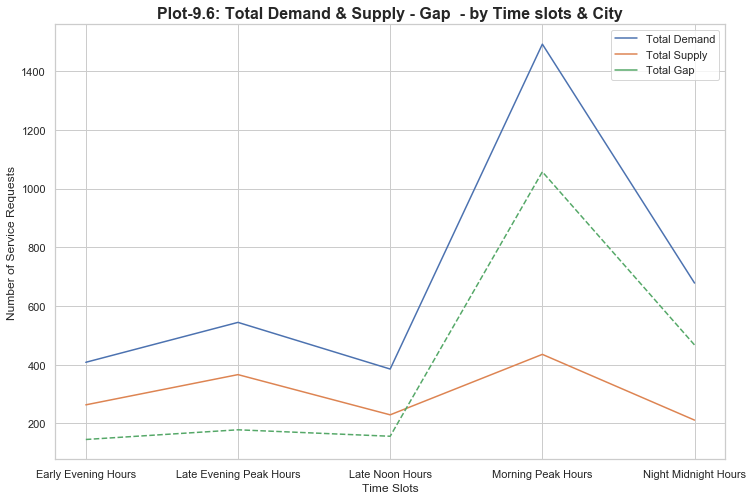

In [66]:
sns.set()
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))

# Draw lineplot for the multiline plot.

ax =sns.lineplot(x="Window_Time", y="Total_Demand",
             markers=True, dashes=False, data=timeslot_demand_supply_city_gap,
             label="Total Demand")
ax =sns.lineplot(x="Window_Time", y="Total_Supply",
             markers=True, dashes=False, data=timeslot_demand_supply_city_gap,
             label="Total Supply")
ax =sns.lineplot(x="Window_Time", y="Total_Gap", 
             markers=True, dashes=False, data=timeslot_demand_supply_city_gap,
             label="Total Gap")

# differentiate Gap with line style.
ax.lines[2].set_linestyle("--")

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}

ax.set_title("Plot-9.6: Total Demand & Supply - Gap  - by Time slots & City",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Number of Service Requests",fontsize=12)
ax.set_xlabel("Time Slots",fontsize=12)

plt.show()

###  Plot-9.7: Plot Total Demand & Supply - Gap  - on Time slots  &  City - Stacked Bar .<br>

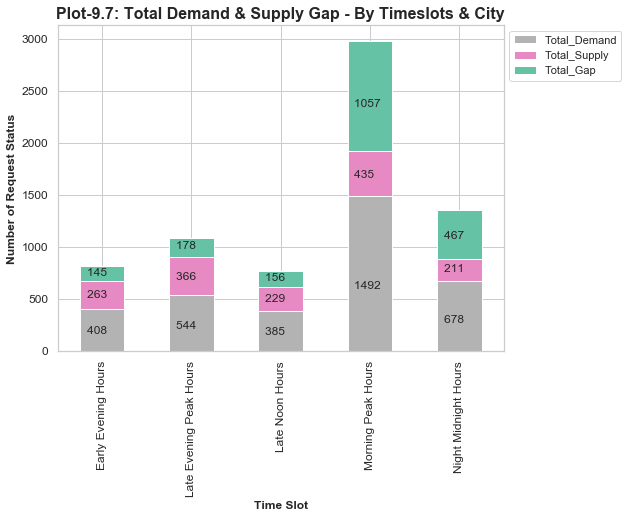

In [67]:
sns.set()
sns.set(style="whitegrid")

# Draw Matplot lib stacked bar.

ax = timeslot_demand_supply_city_gap.plot(x="Window_Time",
                                             kind='bar',
                                             stacked=True,
                                             grid=True,
                                             figsize=(8,6),
                                             colormap=plt.cm.Set2_r,
                                             fontsize=12)

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-9.7: Total Demand & Supply Gap - By Timeslots & City",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_xlabel("Time Slot",fontsize=12,fontdict=fonts)
ax.set_ylabel("Number of Request Status",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))


# Annotate the stacked bar plot

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} '.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

# Display the Stacked Bar Plot.
plt.show()

### **Observations**<br>
>- We have noticed from the earlier finding there is a a huge gap in demand and supply during Morning Peak Hours.
>- Th plot 9.4 & 9.5 (line plot and stacked bar plot) depicts Time-supply gap for during different time slots but only for location pickup City.
 
### **Inferences**<br>

>- It is evident from the above plots the from Air , `the GAP is huge during Morning Peak Hours`.
>- The `gap is of 1057` requests from City to Airport.